In [1]:
import tensorflow as tf
import numpy as np
from formatData import loadData
from sklearn.model_selection import train_test_split
from gan import GenAdvNetwork
import os
from matplotlib import pyplot as plt

2023-03-05 00:50:51.653491: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
"""
Loading data
Note than we can only specify absolute location of the raw data
"""
molRep2D, energies = loadData(12, "/home/panthibivek/thesis/GAN_pkg/data/traj.xyz")
#randomize the data and split it into training and test set
# unison_shuffle(molRep2D, energies)
X_train, X_test, y_train, y_test = train_test_split(molRep2D,energies,
                                   random_state=104, 
                                   test_size=0.1, 
                                   shuffle=True)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)

input data size: (10000, 78)
output data size: (10000,)
Training data size: (9000, 78)
Test data size: (1000, 78)


In [3]:
latent_dim_ = 32
epochs_ = 20
batch_size_ = 16
y_train = np.reshape(y_train, (-1, 1))
X_train = np.array(X_train)
X_train = X_train.astype(float)
X_train = np.reshape(X_train, (-1, 78, 1))
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(buffer_size=100).batch(batch_size_)

2023-03-05 00:50:54.855672: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 00:50:54.856218: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:843] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 00:50:54.888569: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libMIOpen.so'; dlerror: libMIOpen.so: cannot open shared object file: No such file or directory
2023-03-05 00:50:55.073327: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to down

In [4]:
GAN_model = GenAdvNetwork(latent_dim=latent_dim_, batch_size=batch_size_)
GAN_model.compile(
    generator_opt=tf.keras.optimizers.Adam(learning_rate=0.0001),
    discriminator_opt=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss_func=tf.keras.losses.BinaryCrossentropy(),
)
history = GAN_model.fit(dataset, epochs=epochs_)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                429       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 13)                0         
                                                                 
 reshape (Reshape)           (None, 13, 1)             0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 39, 128)          640       
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 39, 128)           0         
                                                                 
 batch_normalization (BatchN  (None, 39, 128)          512       
 ormalization)                                           

2023-03-05 00:50:55.128744: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.130266: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.138452: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.138897: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.143358: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.144343: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.145395: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.147030: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.148248: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55

Epoch 1/20


2023-03-05 00:50:55.300905: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.302003: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.302875: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.303482: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.305079: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.307311: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.308445: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.308915: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.328129: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


  1/563 [..............................] - ETA: 1:29 - g_loss: 0.6834 - d_loss: 0.5297

2023-03-05 00:50:55.330937: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.333378: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.334179: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.336025: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.337017: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.337491: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.339496: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.339955: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55.342157: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-03-05 00:50:55

563/563 [==============================] - 36s 64ms/step - g_loss: 0.0791 - d_loss: 0.0441
Epoch 2/20
563/563 [==============================] - 36s 63ms/step - g_loss: 7.1065e-06 - d_loss: 3.5526e-06
Epoch 3/20
563/563 [==============================] - 36s 63ms/step - g_loss: 2.8533e-06 - d_loss: 1.4024e-06
Epoch 4/20
563/563 [==============================] - 36s 63ms/step - g_loss: 1.3544e-06 - d_loss: 6.7404e-07
Epoch 5/20
563/563 [==============================] - 36s 63ms/step - g_loss: 7.6890e-07 - d_loss: 3.8067e-07
Epoch 6/20
563/563 [==============================] - 36s 63ms/step - g_loss: 4.4780e-07 - d_loss: 2.4046e-07
Epoch 7/20
563/563 [==============================] - 36s 63ms/step - g_loss: 2.8840e-07 - d_loss: 1.4856e-07
Epoch 8/20
563/563 [==============================] - 36s 63ms/step - g_loss: 1.9577e-07 - d_loss: 9.7995e-08
Epoch 9/20
563/563 [==============================] - 36s 64ms/step - g_loss: 1.3191e-07 - d_loss: 6.9153e-08
Epoch 10/20
563/563 [========

In [5]:
train_dir = os.path.dirname(os.path.abspath("__file__")) + "/runs/train/weights/"
GAN_model.save_weights(train_dir + "weights.h5")

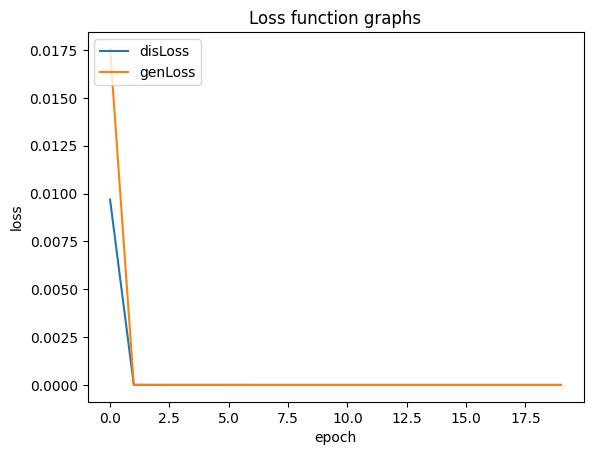

In [7]:
plt.plot(history.history['d_loss'])
plt.plot(history.history['g_loss'])
plt.title('Loss function graphs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['disLoss', 'genLoss'], loc='upper left')
fig1 = plt.gcf()
plt.show()
fig1.savefig(train_dir + 'loss.png', dpi = 300)